Mean score of OLS   = 0.08853091564467709


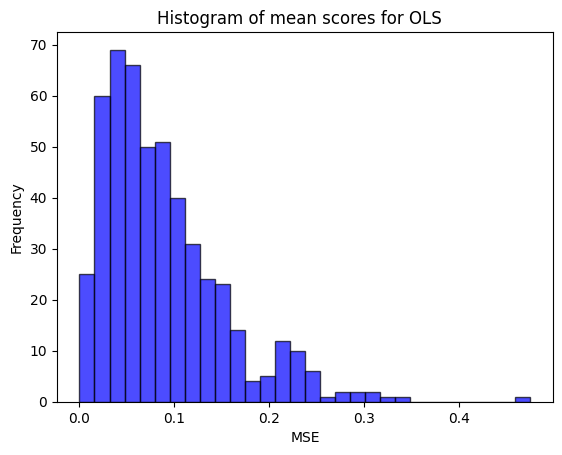

Mean score of Ridge = 0.09635985661707996


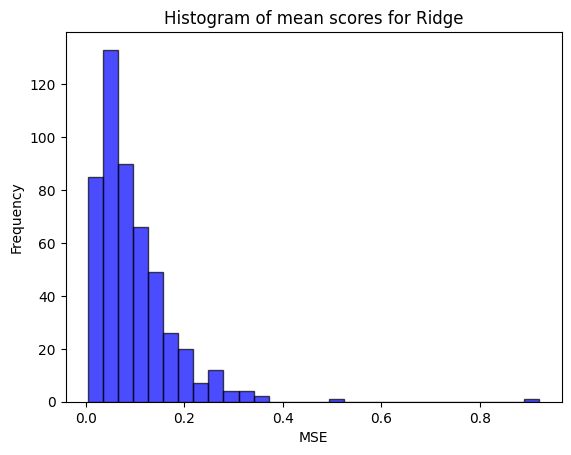

Mean score of Lasso = 0.09965660640306648


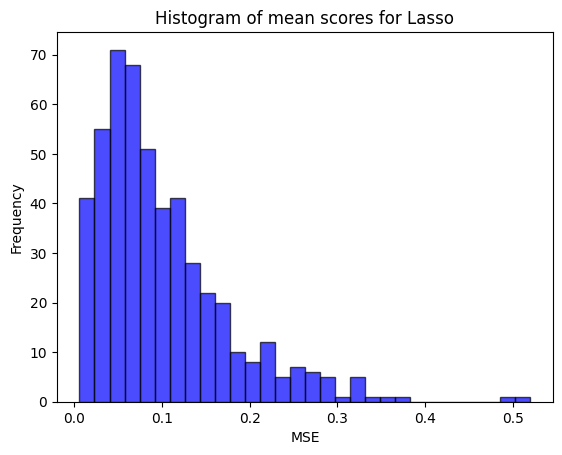

In [8]:
from gradientdescent_lib import *
from crossvalidation_lib import *

x_train, x_test, y_train, y_test = generateData(2500, noise_std = 0.25)
x_train = x_train.flatten(); x_test = x_test.flatten()


learningRate = 0.05
n_features = 4
noIntercept = False
n_folds = 500

optimizer = Optimizers.ADAgrad(learningRate, n_features+int(not noIntercept))

gradient_OLS = Gradients.OLS()
gradient_Ridge = Gradients.Ridge(0.01)
gradient_Lasso = Gradients.Lasso(0.01)

GRADIENTS = [gradient_OLS, gradient_Ridge, gradient_Lasso]

for gradient in GRADIENTS:
    model = GradientDescent(n_features)
    model.setOptimizer(optimizer)
    model.setGradient(gradient)
    
    mean_score, scores = cross_validation(n_folds, x_train, y_train, model.evaluation_function())

    print(f'Mean score of {gradient} = {mean_score}')

    plt.hist(scores, bins=30, alpha=0.7, color='blue', edgecolor='black')
    # Add titles and labels
    plt.title(f'Histogram of mean scores for {gradient}')
    plt.xlabel('MSE')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

